프로젝트 샘플
http://naver.me/50oquHxy

# 여성 의류 사이즈 기준

In [1]:
import pandas as pd
import numpy as np
import re

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from urllib import request
from bs4 import BeautifulSoup
import requests

In [4]:
import selenium
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from urllib.request import urlopen, urlretrieve
from urllib.parse import quote_plus

## 1) 상의 (긴팔 티셔츠) - 크롤링

In [4]:
#'https://www.musinsa.com/app/'
url = 'https://www.musinsa.com/categories/item/001010?d_cat_cd=001010&brand=&list_kind=small&sort=sale_high&sub_sort=3m&page=1&display_cnt=90&group_sale=&exclusive_yn=&sale_goods=&timesale_yn=&ex_soldout=&kids=&color=&price1=&price2=&shoeSizeOption=&tags=&campaign_id=&includeKeywords=&measure='
html = requests.get(url).text
soup = BeautifulSoup(html, 'html.parser')
soup

<!DOCTYPE html>

<html lang="ko">
<head>
<script type="text/javascript">
        var dataLayer = dataLayer || [];
    </script>
<!-- Google Tag Manager -->
<script>(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':
            new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],
        j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';j.async=true;j.src=
        'https://www.googletagmanager.com/gtm.js?id='+i+dl;f.parentNode.insertBefore(j,f);
    })(window,document,'script','dataLayer','GTM-TXDSFSF');</script>
<!-- End Google Tag Manager -->
<script>
        dataLayer.push({
            mainInfo: {
                'email': ""
            }
        });
    </script>
<title>상의 &gt; 긴소매 티셔츠 | 무신사 스토어</title>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible">
<meta content="width=device-width, initial-scale=1, maximum-scale=1, minimum-scale=1, user-scalable=no, viewport-fit=cover" name="viewport"/>
<meta content="총 1719개 브랜드와 반소매 티셔

#### * 상품명 & 링크 추출

In [5]:
##searchList > li:nth-child(1) > div.li_inner > div.article_info > p.list_info > a
soup.select(selector = 'p.list_info > a')

[<a href="//www.musinsa.com/app/goods/2149254" name="goods_link" title="베이식 긴팔 티셔츠 2팩">
                   
                   
                   
                   
                   베이식 긴팔 티셔츠 2팩
                 </a>,
 <a href="//www.musinsa.com/app/goods/404474" name="goods_link" title="[패키지 상품] Longsleeve 무지 긴팔티">
                   
                   
                   
                   
                   [패키지 상품] Longsleeve 무지 긴팔티
                 </a>,
 <a href="//www.musinsa.com/app/goods/1144989" name="goods_link" title="베이식 긴팔 티셔츠 [화이트]">
                   
                   
                   
                   
                   베이식 긴팔 티셔츠 [화이트]
                 </a>,
 <a href="//www.musinsa.com/app/goods/407067" name="goods_link" title="하이 벤트 레이어드 티셔츠 [WHITE]">
                   
                   
                   
                   
                   하이 벤트 레이어드 티셔츠 [WHITE]
                 </a>,
 <a href="//www.musinsa.com/app/goods/1265162" name="goo

In [6]:
products = soup.select(selector = 'p.list_info > a')
products[0]['title']
#products[0]['href']

'베이식 긴팔 티셔츠 2팩'

#### * 각 상품별 사이트만 모아서 리스트로 만들고, for 문 돌려서 사이트 접속하여 사이즈표 읽어오기

In [7]:
#1페이지만 추출
for product in products:
    print(product['title'], ':', product['href'])

베이식 긴팔 티셔츠 2팩 : //www.musinsa.com/app/goods/2149254
[패키지 상품] Longsleeve 무지 긴팔티 : //www.musinsa.com/app/goods/404474
베이식 긴팔 티셔츠 [화이트] : //www.musinsa.com/app/goods/1144989
하이 벤트 레이어드 티셔츠 [WHITE] : //www.musinsa.com/app/goods/407067
[패키지] 에센셜 레이어드 롱 슬리브 티셔츠 : //www.musinsa.com/app/goods/1265162
엔젤 와펜 스트라이프 롱슬리브 블랙 : //www.musinsa.com/app/goods/1322019
[패키지] 더블 코튼 무지 긴팔티 12종 2pack JHL... : //www.musinsa.com/app/goods/1608272
베이식 긴팔 티셔츠 [블랙] : //www.musinsa.com/app/goods/1129745
[ONEMILE WEAR] 2PACK SMALL ARCH ... : //www.musinsa.com/app/goods/2058136
우먼즈 릴렉스드 크루 넥 긴팔 티셔츠 [화이트] : //www.musinsa.com/app/goods/1629101
폰테 크루 넥 긴팔 티셔츠 [오프 화이트] : //www.musinsa.com/app/goods/1190264
하이 벤트 레이어드 티셔츠 [BLACK] : //www.musinsa.com/app/goods/407066
[패키지] NYC LOCATION LONG SLEEVE T... : //www.musinsa.com/app/goods/1130844
폰테 크루 넥 긴팔 티셔츠 [블랙] : //www.musinsa.com/app/goods/1190268
우먼즈 릴렉스드 크루 넥 긴팔 티셔츠 [블랙] : //www.musinsa.com/app/goods/1629100
크루 넥 긴팔 티셔츠 [블랙] : //www.musinsa.com/app/goods/996234
크루 넥 긴팔 티

In [8]:
#1~10페이지 내의 '상품명 & 접속링크' 추출
for i in range(1, 11):
    url = f'https://www.musinsa.com/categories/item/001010?d_cat_cd=001010&brand=&list_kind=small&sort=sale_high&sub_sort=3m&page={i}&display_cnt=90&group_sale=&exclusive_yn=&sale_goods=&timesale_yn=&ex_soldout=&kids=&color=&price1=&price2=&shoeSizeOption=&tags=&campaign_id=&includeKeywords=&measure='
    html = requests.get(url).text
    soup = BeautifulSoup(html, 'html.parser')
    products = soup.select(selector = 'p.list_info > a')
    
    for product in products:
        print(product['title'], ':', product['href'])
    print(f"{i}page 입니다")
    print('-' * 100)
    print()

베이식 긴팔 티셔츠 2팩 : //www.musinsa.com/app/goods/2149254
[패키지 상품] Longsleeve 무지 긴팔티 : //www.musinsa.com/app/goods/404474
베이식 긴팔 티셔츠 [화이트] : //www.musinsa.com/app/goods/1144989
하이 벤트 레이어드 티셔츠 [WHITE] : //www.musinsa.com/app/goods/407067
[패키지] 에센셜 레이어드 롱 슬리브 티셔츠 : //www.musinsa.com/app/goods/1265162
엔젤 와펜 스트라이프 롱슬리브 블랙 : //www.musinsa.com/app/goods/1322019
[패키지] 더블 코튼 무지 긴팔티 12종 2pack JHL... : //www.musinsa.com/app/goods/1608272
베이식 긴팔 티셔츠 [블랙] : //www.musinsa.com/app/goods/1129745
[ONEMILE WEAR] 2PACK SMALL ARCH ... : //www.musinsa.com/app/goods/2058136
우먼즈 릴렉스드 크루 넥 긴팔 티셔츠 [화이트] : //www.musinsa.com/app/goods/1629101
폰테 크루 넥 긴팔 티셔츠 [오프 화이트] : //www.musinsa.com/app/goods/1190264
하이 벤트 레이어드 티셔츠 [BLACK] : //www.musinsa.com/app/goods/407066
[패키지] NYC LOCATION LONG SLEEVE T... : //www.musinsa.com/app/goods/1130844
폰테 크루 넥 긴팔 티셔츠 [블랙] : //www.musinsa.com/app/goods/1190268
우먼즈 릴렉스드 크루 넥 긴팔 티셔츠 [블랙] : //www.musinsa.com/app/goods/1629100
크루 넥 긴팔 티셔츠 [블랙] : //www.musinsa.com/app/goods/996234
크루 넥 긴팔 티

### * 1~10페이지 내의 상품 접속 '링크만' 추출

In [5]:
#1~10페이지 내의 상품 접속 '링크만' 추출
tops = []

for i in range(1, 11):
    url = f'https://www.musinsa.com/categories/item/001010?d_cat_cd=001010&brand=&list_kind=small&sort=sale_high&sub_sort=3m&page={i}&display_cnt=90&group_sale=&exclusive_yn=&sale_goods=&timesale_yn=&ex_soldout=&kids=&color=&price1=&price2=&shoeSizeOption=&tags=&campaign_id=&includeKeywords=&measure='
    html = requests.get(url).text
    soup = BeautifulSoup(html, 'html.parser')
    #사이트 내 상품명 & 링크
    products = soup.select(selector = 'p.list_info > a')
    
    #링크만 추출
    for product in products:
        tops.append(product['href'])

tops_links = []

#링크 모음 리스트 tops 내에 있는 링크에 대한 조건문
for top in tops:
    if 'http:' in top:
        pass
    elif 'https:' in top:
        pass
    else:
        top = 'http:' + top
        tops_links.append(top)
        
print(tops_links)

['http://www.musinsa.com/app/goods/2149254', 'http://www.musinsa.com/app/goods/404474', 'http://www.musinsa.com/app/goods/1144989', 'http://www.musinsa.com/app/goods/407067', 'http://www.musinsa.com/app/goods/1265162', 'http://www.musinsa.com/app/goods/1322019', 'http://www.musinsa.com/app/goods/1608272', 'http://www.musinsa.com/app/goods/1129745', 'http://www.musinsa.com/app/goods/1629101', 'http://www.musinsa.com/app/goods/2058136', 'http://www.musinsa.com/app/goods/1190264', 'http://www.musinsa.com/app/goods/407066', 'http://www.musinsa.com/app/goods/1130844', 'http://www.musinsa.com/app/goods/1190268', 'http://www.musinsa.com/app/goods/1629100', 'http://www.musinsa.com/app/goods/996233', 'http://www.musinsa.com/app/goods/996234', 'http://www.musinsa.com/app/goods/876277', 'http://www.musinsa.com/app/goods/1275019', 'http://www.musinsa.com/app/goods/1383817', 'http://www.musinsa.com/app/goods/1571143', 'http://www.musinsa.com/app/goods/2086668', 'http://www.musinsa.com/app/goods/134

#### * 첫번째 상품의 S 사이즈 치수 출력

In [11]:
#첫번째 상품의 S 사이즈 치수 출력
header = {'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/106.0.0.0 Safari/537.36'}

html = requests.get(tops_links[0], headers = header).text
soup = BeautifulSoup(html, 'html.parser')

columns = soup.find_all(class_ = 'item_val')

size_name = soup.select('#size_table > tbody > tr:nth-child(3) > th')
types2 = soup.select('#size_table > tbody > tr:nth-child(3) > td:nth-child(2)')
types3 = soup.select('#size_table > tbody > tr:nth-child(3) > td:nth-child(3)')
types4 = soup.select('#size_table > tbody > tr:nth-child(3) > td:nth-child(4)')
types5 = soup.select('#size_table > tbody > tr:nth-child(3) > td:nth-child(5)')

print(columns)
print(size_name)
print(types2)
print(types3)
print(types4)
print(types5)

[<th class="item_val">
<input name="diff_range_0" type="hidden" value="5">
                                총장
                            </input></th>, <th class="item_val">
<input name="diff_range_1" type="hidden" value="5"/>
                                어깨너비
                            </th>, <th class="item_val">
<input name="diff_range_2" type="hidden" value="5"/>
                                가슴단면
                            </th>, <th class="item_val">
<input name="diff_range_3" type="hidden" value="5"/>
                                소매길이
                            </th>]
[<th>S</th>]
[<td class="goods_size_val">67.5</td>]
[<td class="goods_size_val">47</td>]
[<td class="goods_size_val">51</td>]
[<td class="goods_size_val">57</td>]


In [12]:
list(columns)[0].text.strip()

'총장'

In [13]:
#사이즈 종류(이름) 추출
str(size_name).replace('[<th>', '').replace('</th>]', '')

'S'

In [14]:
#'S' 사이즈의 총장' 값 추출
str(types2).replace('[<td class="goods_size_val">', '').replace('</td>]', '')

'67.5'

In [15]:
#'S' 사이즈의 총장, 어깨너비, 가슴단면, 소매길이 추출
total_lng = str(types2).replace('[<td class="goods_size_val">', '').replace('</td>]', '')
shoulder = str(types3).replace('[<td class="goods_size_val">', '').replace('</td>]', '')
chest = str(types4).replace('[<td class="goods_size_val">', '').replace('</td>]', '')
arms = str(types5).replace('[<td class="goods_size_val">', '').replace('</td>]', '')

print('total_lng:', total_lng)
print('shoulder:', shoulder)
print('chest:', chest)
print('arms:', arms)

total_lng: 67.5
shoulder: 47
chest: 51
arms: 57


In [16]:
types = dict({'total_lng' : total_lng, 'shoulder' : shoulder, 'chest' : chest, 'arms' : arms})
types

{'total_lng': '67.5', 'shoulder': '47', 'chest': '51', 'arms': '57'}

In [5]:
#S 사이즈
header = {'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/106.0.0.0 Safari/537.36'}

html = requests.get(tops_links[0], headers = header).text
soup = BeautifulSoup(html, 'html.parser')

columns = soup.find_all(class_ = 'item_val')

size3 = soup.select('#size_table > tbody > tr:nth-child(3) > th')

types2 = soup.select('#size_table > tbody > tr:nth-child(3) > td:nth-child(2)')
types3 = soup.select('#size_table > tbody > tr:nth-child(3) > td:nth-child(3)')
types4 = soup.select('#size_table > tbody > tr:nth-child(3) > td:nth-child(4)')
types5 = soup.select('#size_table > tbody > tr:nth-child(3) > td:nth-child(5)')

size_S = str(size3).replace('[<th>', '').replace('</th>]', '')
total_lng = str(types2).replace('[<td class="goods_size_val">', '').replace('</td>]', '')
shoulder = str(types3).replace('[<td class="goods_size_val">', '').replace('</td>]', '')
chest = str(types4).replace('[<td class="goods_size_val">', '').replace('</td>]', '')
arms = str(types5).replace('[<td class="goods_size_val">', '').replace('</td>]', '')

types = dict({'size' : size_S,
              list(columns)[0].text.strip() : total_lng,
              list(columns)[1].text.strip() : shoulder,
              list(columns)[2].text.strip() : chest,
              list(columns)[3].text.strip() : arms})
types

{'size': 'S', '총장': '67.5', '어깨너비': '47', '가슴단면': '51', '소매길이': '57'}

### * 1~10페이지 내 상품들 각각의 S,M,L,XL 사이즈 출력

In [18]:
#상품 하나의 S,M,L,XL 사이즈 출력
header = {'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/106.0.0.0 Safari/537.36'}
tops_data = pd.DataFrame([])

for j in range(0, 2):
    html = requests.get(tops_links[j], headers = header).text
    soup = BeautifulSoup(html, 'html.parser')

    columns = soup.find_all(class_ = 'item_val')

    #size_lst = []
    
    for i in range(3, 7):
        
        size = soup.select(f'#size_table > tbody > tr:nth-child({i}) > th')
        types2 = soup.select(f'#size_table > tbody > tr:nth-child({i}) > td:nth-child(2)')
        types3 = soup.select(f'#size_table > tbody > tr:nth-child({i}) > td:nth-child(3)')
        types4 = soup.select(f'#size_table > tbody > tr:nth-child({i}) > td:nth-child(4)')
        types5 = soup.select(f'#size_table > tbody > tr:nth-child({i}) > td:nth-child(5)')

        size_name = str(size).replace('[<th>', '').replace('</th>]', '')
        total_lng = str(types2).replace('[<td class="goods_size_val">', '').replace('</td>]', '')
        shoulder = str(types3).replace('[<td class="goods_size_val">', '').replace('</td>]', '')
        chest = str(types4).replace('[<td class="goods_size_val">', '').replace('</td>]', '')
        arms = str(types5).replace('[<td class="goods_size_val">', '').replace('</td>]', '')
        
        try:
            types = dict({'size' : size_name,
                          list(columns)[0].text.strip() : total_lng,
                          list(columns)[1].text.strip() : shoulder,
                          list(columns)[2].text.strip() : chest,
                          list(columns)[3].text.strip() : arms}, index = [i])
        except:
            pass

        #size_lst.append(types)
        tops_df = pd.DataFrame(types)
        tops_data = pd.concat([tops_data, tops_df])
    
tops_data

,size,총장,어깨너비,가슴단면,소매길이,index
0,S,67.5,47,51,57,3
0,M,69,48.5,53.5,58,4
0,L,70.5,50,56,59,5
0,XL,72,51.5,58.5,60,6
0,M,72,50,54,60,3
0,L,74,52,56.5,61,4
0,XL,76,54,59,62,5
0,[],[],[],[],[],6


In [6]:
#1~10페이지 내 상품들 각각의 S,M,L,XL 사이즈 출력
header = {'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/106.0.0.0 Safari/537.36'}
tops_data = pd.DataFrame([])

for tops_link in tops_links:
    try:
        html = requests.get(tops_link, headers = header).text
        
    except:
        pass
    
    soup = BeautifulSoup(html, 'html.parser')
    columns = soup.find_all(class_ = 'item_val')
    
    for i in range(3, 7):
        
        size = soup.select(f'#size_table > tbody > tr:nth-child({i}) > th')
        types2 = soup.select(f'#size_table > tbody > tr:nth-child({i}) > td:nth-child(2)')
        types3 = soup.select(f'#size_table > tbody > tr:nth-child({i}) > td:nth-child(3)')
        types4 = soup.select(f'#size_table > tbody > tr:nth-child({i}) > td:nth-child(4)')
        types5 = soup.select(f'#size_table > tbody > tr:nth-child({i}) > td:nth-child(5)')

        size_name = str(size).replace('[<th>', '').replace('</th>]', '')
        total_lng = str(types2).replace('[<td class="goods_size_val">', '').replace('</td>]', '')
        shoulder = str(types3).replace('[<td class="goods_size_val">', '').replace('</td>]', '')
        chest = str(types4).replace('[<td class="goods_size_val">', '').replace('</td>]', '')
        arms = str(types5).replace('[<td class="goods_size_val">', '').replace('</td>]', '')
        
        try:
            types = dict({'size' : size_name,
                          list(columns)[0].text.strip() : total_lng,
                          list(columns)[1].text.strip() : shoulder,
                          list(columns)[2].text.strip() : chest,
                          list(columns)[3].text.strip() : arms}, index = [i-3])
        except:
            pass

        tops_df = pd.DataFrame(types)
        tops_data = pd.concat([tops_data, tops_df])
    
tops_data

,size,총장,어깨너비,가슴단면,소매길이,index
0,S,67.5,47,51,57,0
0,M,69,48.5,53.5,58,1
0,L,70.5,50,56,59,2
0,XL,72,51.5,58.5,60,3
0,M,72,50,54,60,0
...,...,...,...,...,...,...
0,XL,72,57.5,59,60,3
0,S,67,51,53,58,0
0,M,69,52.5,55.5,59,1
0,L,71,54,58,60,2


In [7]:
tops_data = tops_data.sort_values(by='size').reset_index()
tops_dt = tops_data.iloc[:, 1:6]
tops_dt

,size,총장,어깨너비,가슴단면,소매길이
0,(L~XL),65,38,47,63.5
1,(L~XL),65,38,47,63.5
2,(S~M),62,35,44,62
3,(S~M),62,35,44,62
4,0,56,34,36,63.5
...,...,...,...,...,...
3595,티셔츠(L-XL)_팬츠(S-M),64,43.5,49.5,53.5
3596,티셔츠(S-M)_팬츠(L-XL),62,41,47,52
3597,티셔츠(S-M)_팬츠(S-M),62,41,47,52
3598,화이트_L,72,51,55,64


In [11]:
tops_dt['size'].value_counts()

[]        798
L         620
M         613
XL        560
S         439
         ... 
S[090]      1
S_085       1
Small       1
85          1
화이트_M       1
Name: size, Length: 89, dtype: int64

In [14]:
tops = tops_dt.query("size in ['S', 'M', 'L', 'XL']").reset_index().iloc[:, 1:]
tops

,size,총장,어깨너비,가슴단면,소매길이
0,L,73,61,61,61
1,L,70,56,56.5,59
2,L,71,54,59,64
3,L,70,61,63,57.5
4,L,73,55,57,64
...,...,...,...,...,...
2227,XL,74.5,63.5,62.5,57
2228,XL,74,51.5,59,60.5
2229,XL,74,51.5,59,60.5
2230,XL,82,55,70,68


In [ ]:
tops.info()

In [15]:
tops['size'].value_counts()

L     620
M     613
XL    560
S     439
Name: size, dtype: int64

## 2) 원피스 전체 (미니, 미디, 멕시 원피스) - 크롤링

### * 1~10페이지 내의 상품 접속 '링크만' 추출

In [6]:
#1~10페이지 내의 상품 접속 '링크만' 추출
#soup.select(selector= '#searchList > li:nth-child(1) > div.li_inner > div.article_info > p.list_info > a')

dresses = []

for i in range(1, 11):
    url = f'https://www.musinsa.com/categories/item/020?d_cat_cd=020&brand=&list_kind=small&sort=sale_high&sub_sort=3m&page={i}&display_cnt=90&group_sale=&exclusive_yn=&sale_goods=&timesale_yn=&ex_soldout=&kids=&color=&price1=&price2=&shoeSizeOption=&tags=&campaign_id=&includeKeywords=&measure='
    html = requests.get(url).text
    soup = BeautifulSoup(html, 'html.parser')
    #사이트 내 상품명 & 링크
    products = soup.select(selector = 'p.list_info > a')
    
    #링크만 추출
    for product in products:
        dresses.append(product['href'])

dress_links = []

#링크 모음 리스트 dresses 내에 있는 링크에 대한 조건문
for dress in dresses:
    if 'http:' in dress:
        pass
    elif 'https:' in dress:
        pass
    else:
        dress = 'http:' + dress
        dress_links.append(dress)
        
print(dress_links)

['http://www.musinsa.com/app/goods/2714524?loc=goods_rank', 'http://www.musinsa.com/app/goods/2776621?loc=goods_rank', 'http://www.musinsa.com/app/goods/2198859?loc=goods_rank', 'http://www.musinsa.com/app/goods/2697766?loc=goods_rank', 'http://www.musinsa.com/app/goods/2882890?loc=goods_rank', 'http://www.musinsa.com/app/goods/2714533?loc=goods_rank', 'http://www.musinsa.com/app/goods/2846045?loc=goods_rank', 'http://www.musinsa.com/app/goods/2753329?loc=goods_rank', 'http://www.musinsa.com/app/goods/2836338?loc=goods_rank', 'http://www.musinsa.com/app/goods/2630821?loc=goods_rank', 'http://www.musinsa.com/app/goods/1934623?loc=goods_rank', 'http://www.musinsa.com/app/goods/987352?loc=goods_rank', 'http://www.musinsa.com/app/goods/1963314?loc=goods_rank', 'http://www.musinsa.com/app/goods/2392494?loc=goods_rank', 'http://www.musinsa.com/app/goods/1922946?loc=goods_rank', 'http://www.musinsa.com/app/goods/2392489?loc=goods_rank', 'http://www.musinsa.com/app/goods/2448897?loc=goods_rank

In [24]:
dress_links[0]

'http://www.musinsa.com/app/goods/2714524?loc=goods_rank'

#### * 1~10페이지 내 상품들 각각의 S,M,L,XL 사이즈 출력

In [30]:
#1~10페이지 내 상품들 각각의 S,M,L,XL 사이즈 출력
header = {'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/106.0.0.0 Safari/537.36'}
dress_data = pd.DataFrame([])

for dress_link in dress_links:
    try:
        html = requests.get(dress_link, headers = header).text
        
    except:
        pass
    
    soup = BeautifulSoup(html, 'html.parser')
    columns = soup.find_all(class_ = 'item_val')
    
    for i in range(3, 8):
        #size_table > tbody > tr:nth-child(3) > th
        size = soup.select(f'#size_table > tbody > tr:nth-child({i}) > th')
        #size_table > tbody > tr:nth-child(3) > td:nth-child(2)
        types2 = soup.select(f'#size_table > tbody > tr:nth-child({i}) > td:nth-child(2)')
        types3 = soup.select(f'#size_table > tbody > tr:nth-child({i}) > td:nth-child(3)')
        types4 = soup.select(f'#size_table > tbody > tr:nth-child({i}) > td:nth-child(4)')
        types5 = soup.select(f'#size_table > tbody > tr:nth-child({i}) > td:nth-child(5)')
        types6 = soup.select(f'#size_table > tbody > tr:nth-child({i}) > td:nth-child(6)')

        size_name = str(size).replace('[<th>', '').replace('</th>]', '')
        total_lng = str(types2).replace('[<td class="goods_size_val">', '').replace('</td>]', '')
        shoulder = str(types3).replace('[<td class="goods_size_val">', '').replace('</td>]', '')
        chest = str(types4).replace('[<td class="goods_size_val">', '').replace('</td>]', '')
        arms = str(types5).replace('[<td class="goods_size_val">', '').replace('</td>]', '')
        hips = str(types6).replace('[<td class="goods_size_val">', '').replace('</td>]', '')
        
        try:
            types = dict({'size' : size_name,
                          list(columns)[0].text.strip() : total_lng,
                          list(columns)[1].text.strip() : shoulder,
                          list(columns)[2].text.strip() : chest,
                          list(columns)[3].text.strip() : arms,
                          list(columns)[4].text.strip() : hips}, index = [i-3])
        except:
            pass

        dress_df = pd.DataFrame(types)
        dress_data = pd.concat([dress_data, dress_df])
    
dress_data

,size,총장,어깨너비,가슴단면,소매길이,index,엉덩이단면,허리단면,허벅지단면,밑위
0,XL,72,57.5,59,60,3,NaN,NaN,NaN,NaN
0,XL,72,57.5,59,60,3,NaN,NaN,NaN,NaN
0,XL,72,57.5,59,60,3,NaN,NaN,NaN,NaN
0,XL,72,57.5,59,60,3,NaN,NaN,NaN,NaN
0,XL,72,57.5,59,60,3,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
0,[],[],[],[],[],4,[],NaN,NaN,NaN
0,[],[],[],[],[],4,[],NaN,NaN,NaN
0,[],[],[],[],[],4,[],NaN,NaN,NaN
0,[],[],[],[],[],4,[],NaN,NaN,NaN


In [57]:
dress_data['size'].value_counts()

[]           5337
M              45
S              45
FREE           18
L              13
XS             11
옵션없음            8
XL              6
77              2
88              2
55              2
66              2
OS              2
프리사이즈           2
S_085           1
M_088           1
L_091           1
charcoal        1
black / F       1
Name: size, dtype: int64

### * 1~10페이지 내 상품들 각각의 S,M,L,XL 사이즈 출력 (수정)

In [19]:
#1~10페이지 내 상품들 각각의 S,M,L,XL 사이즈 출력 (오류 수정)
header = {'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/106.0.0.0 Safari/537.36'}
dress_data = pd.DataFrame()

for dress_link in dress_links:
    html = requests.get(dress_link, headers = header).text
    soup = BeautifulSoup(html, 'html.parser')
    columns = soup.find_all(class_ = 'item_val')    #사이즈표의 칼럼
    size_cats = soup.select('#size_table > tbody > tr > th')    #사이즈표의 사이즈
    #size_table > tbody
    #size_table > tbody > tr:nth-child(3) > td:nth-child(2)
    
    if columns:
        #사이즈표의 칼럼명 (총장, 어깨너비, ..)
        columns_parts = [column.text.strip() for column in columns]
        #사이즈표의 사이즈명 (S, M, ..)
        size_cate = [cate.text.strip() for cate in size_cats][1:]
        
        #전체 사이즈의 전체 치수 모음 리스트
        size_val = []
        
        for i in range(3, len(size_cats) + 3):
            for j in range(2, len(columns_parts) + 2):
                types = soup.select(f'#size_table > tbody > tr:nth-child({i}) > td:nth-child({j})')
                types = re.sub('[^0-9.]', '', str(types))
                size_val.append(types.strip())
                
        size_val = [v for v in size_val if v]
        
        #각각의 상품 사이즈표 칼럼수 만큼 치수 분배
        n = len(columns_parts)    #사이즈표 칼럼수
        results = [size_val[i * n: (i+1)*n] for i in range((len(size_val) + n-1) // n)]
        colpts = columns_parts * (len(results))
        
        columns_parts = columns_parts * (int(len(size_val) / len(columns_parts)))
        
        categories = []
        
        n = int(len(size_val) / len(size_cate))
        
        for size in size_cate:
            for i in range(n):
                categories.append(size)
                
        size_val_df = pd.DataFrame(size_val)
        size_cate_df = pd.DataFrame(categories)
        columns_part_df = pd.DataFrame(columns_parts)
        
        df_1 = pd.concat([size_val_df, size_cate_df], axis=1)
        df_2 = pd.concat([df_1, columns_part_df], axis=1)
        
        dress_data = pd.concat([dress_data, df_2], axis=0)
        
    else:
        continue
        
dress_data

KeyboardInterrupt: 

## 3) 미니 원피스 - 크롤링

### * 1~10페이지 내의 상품 접속 '링크만' 추출

In [5]:
#1~10페이지 내의 상품 접속 '링크만' 추출
#soup.select(selector= '#searchList > li:nth-child(1) > div.li_inner > div.article_info > p.list_info > a')

mini_dresses = []

for i in range(1, 11):
    url = f'https://www.musinsa.com/categories/item/020006?d_cat_cd=020006&brand=&list_kind=small&sort=sale_high&sub_sort=3m&page={i}&display_cnt=90&group_sale=&exclusive_yn=&sale_goods=&timesale_yn=&ex_soldout=&kids=&color=&price1=&price2=&shoeSizeOption=&tags=&campaign_id=&includeKeywords=&measure='
    html = requests.get(url).text
    soup = BeautifulSoup(html, 'html.parser')
    #사이트 내 상품명 & 링크
    products = soup.select(selector = 'p.list_info > a')
    
    #링크만 추출
    for product in products:
        mini_dresses.append(product['href'])

mini_dress_links = []

#링크 모음 리스트 mini_dresses 내에 있는 링크에 대한 조건문
for mini_dress in mini_dresses:
    if 'http:' in mini_dress:
        pass
    elif 'https:' in mini_dress:
        pass
    else:
        mini_dress = 'http:' + mini_dress
        mini_dress_links.append(mini_dress)
        
print(mini_dress_links)

['http://www.musinsa.com/app/goods/2392489', 'http://www.musinsa.com/app/goods/2714524', 'http://www.musinsa.com/app/goods/2714533', 'http://www.musinsa.com/app/goods/1103286', 'http://www.musinsa.com/app/goods/2478652', 'http://www.musinsa.com/app/goods/2306207', 'http://www.musinsa.com/app/goods/2731616', 'http://www.musinsa.com/app/goods/1779568', 'http://www.musinsa.com/app/goods/2000886', 'http://www.musinsa.com/app/goods/2392491', 'http://www.musinsa.com/app/goods/2512635', 'http://www.musinsa.com/app/goods/2605850', 'http://www.musinsa.com/app/goods/2714448', 'http://www.musinsa.com/app/goods/2714515', 'http://www.musinsa.com/app/goods/2388209', 'http://www.musinsa.com/app/goods/2189753', 'http://www.musinsa.com/app/goods/1455772', 'http://www.musinsa.com/app/goods/2533597', 'http://www.musinsa.com/app/goods/2000879', 'http://www.musinsa.com/app/goods/2448897', 'http://www.musinsa.com/app/goods/2714367', 'http://www.musinsa.com/app/goods/2392493', 'http://www.musinsa.com/app/goo

In [21]:
mini_dress_links[0]

'http://www.musinsa.com/app/goods/2392489'

In [30]:
#1~10페이지 내 상품들 각각의 S,M,L,XL 사이즈 출력
header = {'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/106.0.0.0 Safari/537.36'}
dress_data = pd.DataFrame([])

for dress_link in dress_links:
    try:
        html = requests.get(dress_link, headers = header).text
        
    except:
        pass
    
    soup = BeautifulSoup(html, 'html.parser')
    columns = soup.find_all(class_ = 'item_val')
    
    for i in range(3, 8):
        #size_table > tbody > tr:nth-child(3) > th
        size = soup.select(f'#size_table > tbody > tr:nth-child({i}) > th')
        #size_table > tbody > tr:nth-child(3) > td:nth-child(2)
        types2 = soup.select(f'#size_table > tbody > tr:nth-child({i}) > td:nth-child(2)')
        types3 = soup.select(f'#size_table > tbody > tr:nth-child({i}) > td:nth-child(3)')
        types4 = soup.select(f'#size_table > tbody > tr:nth-child({i}) > td:nth-child(4)')
        types5 = soup.select(f'#size_table > tbody > tr:nth-child({i}) > td:nth-child(5)')
        types6 = soup.select(f'#size_table > tbody > tr:nth-child({i}) > td:nth-child(6)')

        size_name = str(size).replace('[<th>', '').replace('</th>]', '')
        total_lng = str(types2).replace('[<td class="goods_size_val">', '').replace('</td>]', '')
        shoulder = str(types3).replace('[<td class="goods_size_val">', '').replace('</td>]', '')
        chest = str(types4).replace('[<td class="goods_size_val">', '').replace('</td>]', '')
        arms = str(types5).replace('[<td class="goods_size_val">', '').replace('</td>]', '')
        hips = str(types6).replace('[<td class="goods_size_val">', '').replace('</td>]', '')
        
        try:
            types = dict({'size' : size_name,
                          list(columns)[0].text.strip() : total_lng,
                          list(columns)[1].text.strip() : shoulder,
                          list(columns)[2].text.strip() : chest,
                          list(columns)[3].text.strip() : arms,
                          list(columns)[4].text.strip() : hips}, index = [i-3])
        except:
            pass

        dress_df = pd.DataFrame(types)
        dress_data = pd.concat([dress_data, dress_df])
    
dress_data

,size,총장,어깨너비,가슴단면,소매길이,index,엉덩이단면,허리단면,허벅지단면,밑위
0,XL,72,57.5,59,60,3,NaN,NaN,NaN,NaN
0,XL,72,57.5,59,60,3,NaN,NaN,NaN,NaN
0,XL,72,57.5,59,60,3,NaN,NaN,NaN,NaN
0,XL,72,57.5,59,60,3,NaN,NaN,NaN,NaN
0,XL,72,57.5,59,60,3,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
0,[],[],[],[],[],4,[],NaN,NaN,NaN
0,[],[],[],[],[],4,[],NaN,NaN,NaN
0,[],[],[],[],[],4,[],NaN,NaN,NaN
0,[],[],[],[],[],4,[],NaN,NaN,NaN


In [57]:
dress_data['size'].value_counts()

[]           5337
M              45
S              45
FREE           18
L              13
XS             11
옵션없음            8
XL              6
77              2
88              2
55              2
66              2
OS              2
프리사이즈           2
S_085           1
M_088           1
L_091           1
charcoal        1
black / F       1
Name: size, dtype: int64

### * 1~10페이지 내 상품들 각각의 S,M,L,XL 사이즈 출력 (수정)

In [6]:
#1~10페이지 내 상품들 각각의 S,M,L,XL 사이즈 출력 (오류 수정)
header = {'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/106.0.0.0 Safari/537.36'}
mini_dress_data = pd.DataFrame()

for mini_dress_link in mini_dress_links:
    html = requests.get(mini_dress_link, headers = header).text
    soup = BeautifulSoup(html, 'html.parser')
    columns = soup.find_all(class_ = 'item_val')    #사이즈표의 칼럼
    size_cats = soup.select('#size_table > tbody > tr > th')    #사이즈표의 사이즈
    #size_table > tbody
    #size_table > tbody > tr:nth-child(3) > td:nth-child(2)
    
    if columns:
        #사이즈표의 칼럼명 (총장, 어깨너비, ..)
        columns_parts = [column.text.strip() for column in columns]
        #사이즈표의 사이즈명 (S, M, ..)
        size_cate = [cate.text.strip() for cate in size_cats][1:]
        
        #사이즈 치수 모음 리스트
        size_val = []
        
        for i in range(3, len(size_cats) + 3):    #i : S, M, ...
            for j in range(2, len(columns_parts) + 2):    #j : 총장, 어깨너비, ...
                types = soup.select(f'#size_table > tbody > tr:nth-child({i}) > td:nth-child({j})')
                types = re.sub('[^0-9.]', '', str(types))
                size_val.append(types.strip())
                
        size_val = [v for v in size_val if v]    #없는 값은 제외
        
        #각각의 상품 사이즈표 칼럼수 만큼 치수 분배
        n = len(columns_parts)    #사이즈표 칼럼수
        results = [size_val[i * n: (i+1)*n] for i in range((len(size_val) + n-1) // n)]
        colpts = columns_parts * (len(results))
        
        columns_parts = columns_parts * (int(len(size_val) / len(columns_parts)))
        
        categories = []
        
        n = int(len(size_val) / len(size_cate))
        
        for size in size_cate:
            for i in range(n):
                categories.append(size)
                
        size_val_df = pd.DataFrame(size_val)
        size_cate_df = pd.DataFrame(categories)
        columns_part_df = pd.DataFrame(columns_parts)
        
        df_1 = pd.concat([size_val_df, size_cate_df], axis=1)
        df_2 = pd.concat([df_1, columns_part_df], axis=1)
        
        mini_dress_data = pd.concat([mini_dress_data, df_2], axis=0)
        
    else:
        continue
        
mini_dress_data

,0,0,0
0,81.5,XS,총장
1,35.7,XS,어깨너비
2,41.5,XS,가슴단면
3,17.8,XS,소매길이
4,82.5,S,총장
...,...,...,...
3,79,095,총장
4,31,095,어깨너비
5,39,095,가슴단면
0,81,FREE,총장


#### * 데이터 프레임 정리

In [7]:
mini_dress_data.columns = ['measures', 'size', 'columns']
mini_dress_data['size'].value_counts()

S        1370
M        1323
FREE      685
L         168
XS        164
         ... 
L-XL        2
네이비/S       2
네이비/M       2
blue        2
XS-S        2
Name: size, Length: 113, dtype: int64

In [8]:
mini_dress_data.query("size in ['S', 'M', 'L', 'XL']")

,measures,size,columns
4,82.5,S,총장
5,37,S,어깨너비
6,44,S,가슴단면
7,18.5,S,소매길이
8,83.5,M,총장
...,...,...,...
3,26,S,소매길이
4,87,M,총장
5,36,M,어깨너비
6,47.5,M,가슴단면


In [ ]:
mini_dress_dt = mini_dress_data.query("size in ['S', 'M', 'L', 'XL']")

## 4) 사이즈코리아 데이터 비교 시각화

In [9]:
# 한글 폰트 적용
plt.rc('font', family='NanumBarunGothic') 
# 캔버스 사이즈 적용
plt.rcParams["figure.figsize"] = (12, 9)

### * 상의

In [37]:
tops

,size,총장,어깨너비,가슴단면,소매길이
0,L,73,61,61,61
1,L,70,56,56.5,59
2,L,71,54,59,64
3,L,70,61,63,57.5
4,L,73,55,57,64
...,...,...,...,...,...
2227,XL,74.5,63.5,62.5,57
2228,XL,74,51.5,59,60.5
2229,XL,74,51.5,59,60.5
2230,XL,82,55,70,68


In [48]:
tops_S = tops.query("size == 'S'")
tops_M = tops.query("size == 'M'")
tops_L = tops.query("size == 'L'")
tops_XL = tops.query("size == 'XL'")
tops_S

,size,총장,어깨너비,가슴단면,소매길이
1233,S,68.5,53.5,57.5,52.5
1234,S,71,56.5,63,59
1235,S,67,56,56,57
1236,S,68,53,51.5,57
1237,S,68.6,46.5,52.5,56
...,...,...,...,...,...
1667,S,66,53,51.5,57
1668,S,68,58.5,57.5,59
1669,S,65,51,54.5,60.5
1670,S,67.5,49,50,58


#### ① 어깨너비

In [61]:
dt_1992 = pd.read_csv("C:/Users/AB350/#실습(221031~221111)/1992_size_measures.csv")
wm_dt_1992 = dt_1992.query("성별 == '여자'")
wm_dt_1992[:5]

,Unnamed: 0,ID,성별,나이,키,눈높이,어깨높이,목뒤높이,허리높이,팔굽힌팔꿈높이,...,손길이,손너비,손둘레,손바닥길이,손두께,발길이,발너비,발등둘레,발목둘레,몸무게
4559,4560,4560,여자,6,1117.0,1006.0,869.0,914.0,680.0,653.0,...,130.0,56.0,135.0,75.0,19.0,167.0,64.0,169.0,168.0,180.0
4560,4561,4561,여자,6,1121.0,994.0,878.0,937.0,692.0,683.0,...,120.0,52.0,124.0,68.0,17.0,175.0,66.0,161.0,164.0,170.0
4561,4562,4562,여자,6,1153.0,1035.0,921.0,952.0,678.0,675.0,...,127.0,57.0,140.0,67.0,19.0,172.0,64.0,195.0,184.0,200.0
4562,4563,4563,여자,6,1200.0,1080.0,925.0,971.0,673.0,692.0,...,123.0,56.0,134.0,67.0,19.0,191.0,74.0,192.0,184.0,215.0
4563,4564,4564,여자,6,1266.0,1174.0,1012.0,1073.0,782.0,755.0,...,140.0,82.0,163.0,76.0,22.0,187.0,82.0,200.0,198.0,250.0


In [64]:
wm_dt_1992.iloc[:, 4:] = wm_dt_1992.iloc[:, 4:] / 10
wm_dt_1992

C:\Users\AB350\AppData\Local\Temp\ipykernel_12304\1258607021.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wm_dt_1992.iloc[:, 4:] = wm_dt_1992.iloc[:, 4:] / 10


,Unnamed: 0,ID,성별,나이,키,눈높이,어깨높이,목뒤높이,허리높이,팔굽힌팔꿈높이,...,손길이,손너비,손둘레,손바닥길이,손두께,발길이,발너비,발등둘레,발목둘레,몸무게
4559,4560,4560,여자,6,111.7,100.6,86.9,91.4,68.0,65.3,...,13.0,5.6,13.5,7.5,1.900000,16.7,6.4,16.9,16.8,18.0
4560,4561,4561,여자,6,112.1,99.4,87.8,93.7,69.2,68.3,...,12.0,5.2,12.4,6.8,1.700000,17.5,6.6,16.1,16.4,17.0
4561,4562,4562,여자,6,115.3,103.5,92.1,95.2,67.8,67.5,...,12.7,5.7,14.0,6.7,1.900000,17.2,6.4,19.5,18.4,20.0
4562,4563,4563,여자,6,120.0,108.0,92.5,97.1,67.3,69.2,...,12.3,5.6,13.4,6.7,1.900000,19.1,7.4,19.2,18.4,21.5
4563,4564,4564,여자,6,126.6,117.4,101.2,107.3,78.2,75.5,...,14.0,8.2,16.3,7.6,2.200000,18.7,8.2,20.0,19.8,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8919,8920,8918,여자,49,156.3,145.1,126.5,133.3,95.4,94.2,...,17.0,9.2,20.4,9.7,3.300000,22.4,10.0,23.0,24.1,65.0
8920,8921,8919,여자,40,153.1,143.6,125.8,129.3,97.1,95.8,...,16.7,8.2,19.2,10.1,2.700000,22.4,8.8,23.5,24.0,59.5
8921,8922,8921,여자,41,147.6,137.1,121.5,127.4,88.0,91.2,...,16.4,8.6,18.8,9.4,2.588863,22.4,8.6,21.9,24.2,57.5
8922,8923,8922,여자,40,144.6,135.1,118.6,121.5,85.3,87.7,...,16.3,8.6,17.9,9.0,2.300000,21.6,8.3,22.4,20.8,48.0


In [65]:
wm_shd_1992 = wm_dt_1992[['나이', '키', '어깨너비']]
wm_shd_1992

,나이,키,어깨너비
4559,6,111.7,23.3
4560,6,112.1,23.7
4561,6,115.3,22.6
4562,6,120.0,24.3
4563,6,126.6,27.2
...,...,...,...
8919,49,156.3,35.7
8920,40,153.1,34.3
8921,41,147.6,33.4
8922,40,144.6,32.9


In [66]:
wm_shd_1992.query("나이 >= 20")

,나이,키,어깨너비
7703,20,154.3,31.6
7704,20,160.5,36.1
7705,20,154.3,36.3
7706,20,164.2,34.2
7707,20,165.9,36.4
...,...,...,...
8919,49,156.3,35.7
8920,40,153.1,34.3
8921,41,147.6,33.4
8922,40,144.6,32.9


C:\Users\AB350\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\AB350\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\AB350\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

<AxesSubplot:xlabel='어깨너비', ylabel='Density'>

C:\Users\AB350\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50612 (\N{HANGUL SYLLABLE EO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\AB350\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44648 (\N{HANGUL SYLLABLE GGAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\AB350\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45320 (\N{HANGUL SYLLABLE NEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\AB350\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


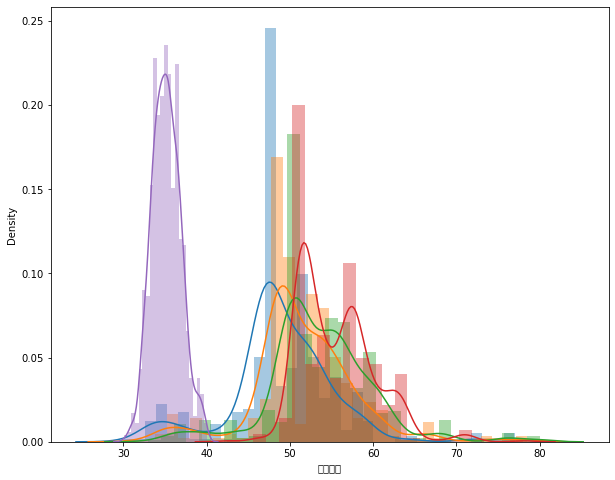

In [67]:
fig, ax = plt.subplots(figsize=(10,8))

sns.distplot(tops_S['어깨너비'])
sns.distplot(tops_M['어깨너비'])
sns.distplot(tops_L['어깨너비'])
sns.distplot(tops_XL['어깨너비'])
sns.distplot(wm_shd_1992.query("나이 >= 20")['어깨너비'])

In [73]:
dt_1997 = pd.read_csv("C:/Users/AB350/#실습(221031~221111)/1997_size_measures.csv")
wm_dt_1997 = dt_1997.query("성별 == '여자'")

wm_dt_1997.iloc[:, 4:] = wm_dt_1997.iloc[:, 4:] / 10

wm_shd_1997 = wm_dt_1997[['나이', '키', '어깨너비']]

wm_shd_1997.query("나이 >= 20")

C:\Users\AB350\AppData\Local\Temp\ipykernel_12304\2611209705.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wm_dt_1997.iloc[:, 4:] = wm_dt_1997.iloc[:, 4:] / 10


,나이,키,어깨너비
11244,20,162.0000,37.3
11245,20,165.6000,34.9
11246,20,167.1000,35.5
11247,20,166.2000,33.6
11248,20,155.9000,35.8
...,...,...,...
12888,76,151.1000,34.5
12889,65,165.1277,37.3
12890,63,159.5000,35.4
12891,70,144.6000,33.1


C:\Users\AB350\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\AB350\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\AB350\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

<AxesSubplot:xlabel='어깨너비', ylabel='Density'>

C:\Users\AB350\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50612 (\N{HANGUL SYLLABLE EO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\AB350\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44648 (\N{HANGUL SYLLABLE GGAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\AB350\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45320 (\N{HANGUL SYLLABLE NEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\AB350\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


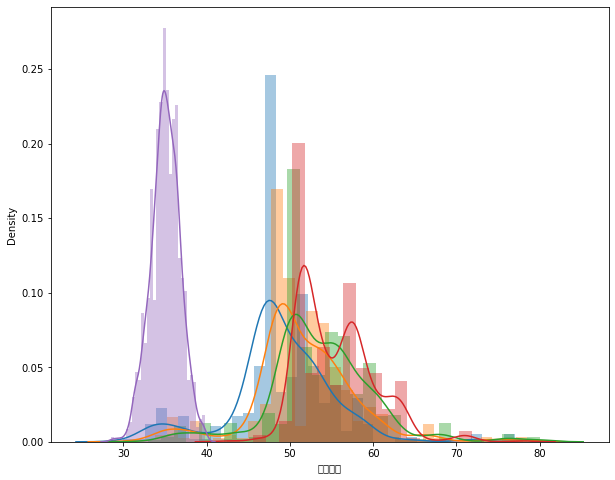

In [74]:
fig, ax = plt.subplots(figsize=(10,8))

sns.distplot(tops_S['어깨너비'])
sns.distplot(tops_M['어깨너비'])
sns.distplot(tops_L['어깨너비'])
sns.distplot(tops_XL['어깨너비'])
sns.distplot(wm_shd_1997.query("나이 >= 20")['어깨너비'])

In [82]:
dt_2010 = pd.read_csv("C:/Users/AB350/#실습(221031~221111)/2010_size_measures.csv")
wm_dt_2010 = dt_2010.query("성별 == '여'")

In [83]:
wm_dt_2010[['키', '어깨너비']] = wm_dt_2010[['키', '어깨너비']] / 10
wm_dt_2010[['나이', '키', '어깨너비']]

C:\Users\AB350\AppData\Local\Temp\ipykernel_12304\2410682458.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wm_dt_2010[['키', '어깨너비']] = wm_dt_2010[['키', '어깨너비']] / 10


,나이,키,어깨너비
7532,7,110.7,23.9
7533,7,115.9,26.0
7534,7,119.0,25.9
7535,7,122.4,29.2
7536,7,122.5,27.2
...,...,...,...
14011,66,154.7,35.1
14012,61,147.5,36.4
14013,66,153.1,36.6
14014,61,156.3,36.0


In [84]:
wm_shd_2010 = wm_dt_2010[['나이', '키', '어깨너비']]
wm_shd_2010.query("나이 >= 20")

,나이,키,어깨너비
11571,22,153.5,33.5
11572,21,154.0,30.7
11573,21,161.7,35.4
11574,20,164.5,34.7
11575,21,169.0,40.3
...,...,...,...
14011,66,154.7,35.1
14012,61,147.5,36.4
14013,66,153.1,36.6
14014,61,156.3,36.0


C:\Users\AB350\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\AB350\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\AB350\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

<AxesSubplot:xlabel='어깨너비', ylabel='Density'>

C:\Users\AB350\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50612 (\N{HANGUL SYLLABLE EO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\AB350\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44648 (\N{HANGUL SYLLABLE GGAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\AB350\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45320 (\N{HANGUL SYLLABLE NEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\AB350\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


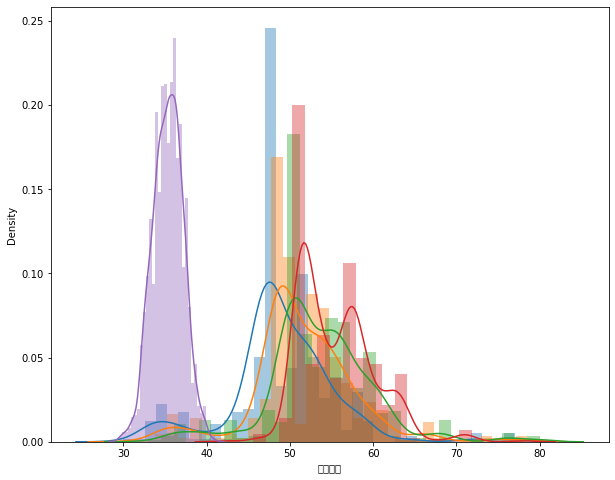

In [85]:
fig, ax = plt.subplots(figsize=(10,8))

sns.distplot(tops_S['어깨너비'])
sns.distplot(tops_M['어깨너비'])
sns.distplot(tops_L['어깨너비'])
sns.distplot(tops_XL['어깨너비'])
sns.distplot(wm_shd_2010.query("나이 >= 20")['어깨너비'])

In [86]:
dt_2015 = pd.read_csv("C:/Users/AB350/#실습(221031~221111)/2015_size_measures.csv")
wm_dt_2015 = dt_2015.query("성별 == '여'")

wm_dt_2015[['키', '어깨너비']] = wm_dt_2015[['키', '어깨너비']] / 10

wm_shd_2015 = wm_dt_2015[['나이', '키', '어깨너비']]
wm_shd_2015.query("나이 >= 20")

C:\Users\AB350\AppData\Local\Temp\ipykernel_12304\2618142126.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wm_dt_2015[['키', '어깨너비']] = wm_dt_2015[['키', '어깨너비']] / 10


,나이,키,어깨너비
44,20,156.0,34.2
45,31,154.4,35.0
47,21,165.6,38.0
48,55,166.1,39.9
49,22,166.9,37.1
...,...,...,...
6415,20,170.6,36.3
6416,20,162.4,35.5
6417,44,150.8,35.2
6418,20,157.4,35.0


C:\Users\AB350\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\AB350\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\AB350\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

<AxesSubplot:xlabel='어깨너비', ylabel='Density'>

C:\Users\AB350\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50612 (\N{HANGUL SYLLABLE EO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\AB350\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44648 (\N{HANGUL SYLLABLE GGAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\AB350\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45320 (\N{HANGUL SYLLABLE NEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\AB350\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


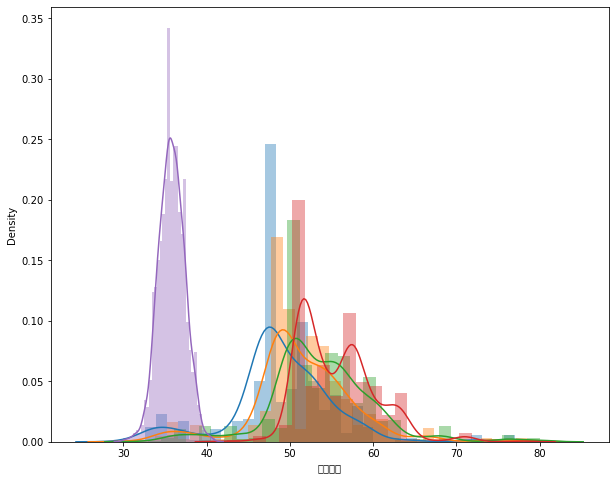

In [87]:
fig, ax = plt.subplots(figsize=(10,8))

sns.distplot(tops_S['어깨너비'])
sns.distplot(tops_M['어깨너비'])
sns.distplot(tops_L['어깨너비'])
sns.distplot(tops_XL['어깨너비'])
sns.distplot(wm_shd_2015.query("나이 >= 20")['어깨너비'])

### * 미니 원피스

In [12]:
dt_2020 = pd.read_csv("C:/Users/admin/#실습(221031~221111)/2020_size_measures.csv").query("성별 == '여'")
dt_2020[:5]

C:\Users\admin\AppData\Local\Temp\ipykernel_2348\2699867853.py:1: DtypeWarning: Columns (8,10) have mixed types. Specify dtype option on import or set low_memory=False.
  dt_2020 = pd.read_csv("C:/Users/admin/#실습(221031~221111)/2020_size_measures.csv").query("성별 == '여'")


,Unnamed: 0,HUMAN_ID,성별,조사년도,조사일,나이,측정지,측정복\n젖가슴둘레,측정복\n상의,측정복\n배꼽수준허리둘레,...,128. 배꼽수준앞중심길이,129. 배꼽수준등길이,130. 목뒤젖꼭지길이,131. 목뒤젖꼭지허리둘레선길이,132. 배꼽수준샅앞뒤길이,133. 앉은눈높이,134. 앉은목뒤높이,135. 앉은어깨높이,136. 앉은팔꿈치높이(팔굽힌),137. 위팔수직길이(팔굽힌)
3,4,20_F_1465,여,2020,1116,42,서울/경기/강원,86.0,85XL,88.0,...,449,453.0,356.5,546.5,882,796,659,626.0,294.0,332.0
4,5,20_F_1467,여,2020,1116,42,서울/경기/강원,73.6,75M,74.5,...,360,391.0,331.5,477.5,731,738,592,544.0,234.0,310.0
5,6,20_F_1477,여,2020,1116,40,서울/경기/강원,74.3,75M,77.0,...,372,405.0,326.5,488.5,749,738,601,552.0,203.0,349.0
6,7,20_F_1486,여,2020,1117,43,서울/경기/강원,77.5,80L,78.0,...,434,428.0,331.5,517.5,741,753,611,581.0,268.0,313.0
7,8,20_F_1490,여,2020,1117,40,서울/경기/강원,80.0,80L,80.0,...,405,415.0,333.5,527.5,696,716,578,544.0,245.0,299.0


In [13]:
dt_2020.query("나이 >= 20")

,Unnamed: 0,HUMAN_ID,성별,조사년도,조사일,나이,측정지,측정복\n젖가슴둘레,측정복\n상의,측정복\n배꼽수준허리둘레,...,128. 배꼽수준앞중심길이,129. 배꼽수준등길이,130. 목뒤젖꼭지길이,131. 목뒤젖꼭지허리둘레선길이,132. 배꼽수준샅앞뒤길이,133. 앉은눈높이,134. 앉은목뒤높이,135. 앉은어깨높이,136. 앉은팔꿈치높이(팔굽힌),137. 위팔수직길이(팔굽힌)
3,4,20_F_1465,여,2020,1116,42,서울/경기/강원,86.0,85XL,88.0,...,449,453.0,356.5,546.5,882,796,659,626.0,294.0,332.0
4,5,20_F_1467,여,2020,1116,42,서울/경기/강원,73.6,75M,74.5,...,360,391.0,331.5,477.5,731,738,592,544.0,234.0,310.0
5,6,20_F_1477,여,2020,1116,40,서울/경기/강원,74.3,75M,77.0,...,372,405.0,326.5,488.5,749,738,601,552.0,203.0,349.0
6,7,20_F_1486,여,2020,1117,43,서울/경기/강원,77.5,80L,78.0,...,434,428.0,331.5,517.5,741,753,611,581.0,268.0,313.0
7,8,20_F_1490,여,2020,1117,40,서울/경기/강원,80.0,80L,80.0,...,405,415.0,333.5,527.5,696,716,578,544.0,245.0,299.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5069,5070,21_F_7275,여,2021,924,27,경상권,82.0,85.0,81.0,...,390,448.0,319.5,483.5,753,767,636,575.0,269.0,306.0
5070,5071,21_F_7276,여,2021,924,34,경상권,79.0,80.0,77.0,...,349,396.0,328.0,460.0,640,723,579,529.0,248.0,281.0
5071,5072,21_F_7277,여,2021,924,32,경상권,97.0,95.0,87.0,...,428,440.0,367.5,547.5,760,774,634,589.0,259.0,330.0
5082,5083,21_F_7288,여,2021,924,31,경상권,91.0,80.0,81.0,...,410,450.0,366.5,506.5,784,729,620,568.0,244.0,324.0


#### ① (목뒤높이 - 허리높이) + (허리높이 - 무릎높이) / 2

In [14]:
#004. 목뒤높이, 009. 허리높이, 014. 무릎높이
dt_2020.loc[:, "004. 목뒤높이 "] = dt_2020.loc[:, "004. 목뒤높이 "] / 10
dt_2020.loc[:, "009. 허리높이 "] = dt_2020.loc[:, "009. 허리높이 "] / 10
dt_2020.loc[:, "014. 무릎높이 "] = dt_2020.loc[:, "014. 무릎높이 "] / 10

In [15]:
dt_2020['mini_dress_length'] = (dt_2020.loc[:, "004. 목뒤높이 "] - dt_2020.loc[:, "009. 허리높이 "]) + (dt_2020.loc[:, "009. 허리높이 "] - dt_2020.loc[:, "014. 무릎높이 "]) * 0.5
dt_2020[:5]

,Unnamed: 0,HUMAN_ID,성별,조사년도,조사일,나이,측정지,측정복\n젖가슴둘레,측정복\n상의,측정복\n배꼽수준허리둘레,...,129. 배꼽수준등길이,130. 목뒤젖꼭지길이,131. 목뒤젖꼭지허리둘레선길이,132. 배꼽수준샅앞뒤길이,133. 앉은눈높이,134. 앉은목뒤높이,135. 앉은어깨높이,136. 앉은팔꿈치높이(팔굽힌),137. 위팔수직길이(팔굽힌),mini_dress_length
3,4,20_F_1465,여,2020,1116,42,서울/경기/강원,86.0,85XL,88.0,...,453.0,356.5,546.5,882,796,659,626.0,294.0,332.0,71.00
4,5,20_F_1467,여,2020,1116,42,서울/경기/강원,73.6,75M,74.5,...,391.0,331.5,477.5,731,738,592,544.0,234.0,310.0,65.25
5,6,20_F_1477,여,2020,1116,40,서울/경기/강원,74.3,75M,77.0,...,405.0,326.5,488.5,749,738,601,552.0,203.0,349.0,67.55
6,7,20_F_1486,여,2020,1117,43,서울/경기/강원,77.5,80L,78.0,...,428.0,331.5,517.5,741,753,611,581.0,268.0,313.0,66.40
7,8,20_F_1490,여,2020,1117,40,서울/경기/강원,80.0,80L,80.0,...,415.0,333.5,527.5,696,716,578,544.0,245.0,299.0,64.00


In [16]:
md_dt_2020 = dt_2020[['나이', 'mini_dress_length']].sort_values(by='나이')
md_dt_2020

,나이,mini_dress_length
4551,20,69.20
1102,20,66.95
1103,20,67.60
2849,20,65.70
1104,20,63.25
...,...,...
2241,69,64.45
2109,69,66.20
2222,69,62.00
4295,69,63.90


In [19]:
mini_dress_data

,measures,size,columns
0,81.5,XS,총장
1,35.7,XS,어깨너비
2,41.5,XS,가슴단면
3,17.8,XS,소매길이
4,82.5,S,총장
...,...,...,...
3,79,095,총장
4,31,095,어깨너비
5,39,095,가슴단면
0,81,FREE,총장


In [20]:
mini_dress_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5096 entries, 0 to 1
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   measures  5096 non-null   object
 1   size      5094 non-null   object
 2   columns   5091 non-null   object
dtypes: object(3)
memory usage: 159.2+ KB


In [22]:
mini_dress_data['measures'] = mini_dress_data['measures'].astype('float')
mini_dress_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5096 entries, 0 to 1
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   measures  5096 non-null   float64
 1   size      5094 non-null   object 
 2   columns   5091 non-null   object 
dtypes: float64(1), object(2)
memory usage: 159.2+ KB


In [23]:
mini_S = mini_dress_data.query("size == 'S'").reset_index().drop(['index'], axis=1)
mini_M = mini_dress_data.query("size == 'M'").reset_index().drop(['index'], axis=1)
mini_L = mini_dress_data.query("size == 'L'").reset_index().drop(['index'], axis=1)
mini_XL = mini_dress_data.query("size == 'XL'").reset_index().drop(['index'], axis=1)

In [25]:
mini_S.query("columns == '총장'").sort_values(by='measures')

,measures,size,columns
259,34.5,S,총장
945,39.0,S,총장
194,42.0,S,총장
814,52.0,S,총장
499,57.0,S,총장
...,...,...,...
903,94.0,S,총장
479,95.2,S,총장
965,107.0,S,총장
1139,107.0,S,총장


In [27]:
mini_S_total = mini_S.query("columns == '총장'").sort_values(by='measures')
mini_S_total['measures']

259      34.5
945      39.0
194      42.0
814      52.0
499      57.0
        ...  
903      94.0
479      95.2
965     107.0
1139    107.0
332     123.5
Name: measures, Length: 388, dtype: float64

In [28]:
mini_M_total = mini_M.query("columns == '총장'").sort_values(by='measures')
mini_M_total['measures']

257      37.0
920      40.0
192      44.0
791      54.5
486      58.4
        ...  
225      97.0
152      97.0
1109    109.0
940     109.0
326     125.0
Name: measures, Length: 372, dtype: float64

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

<AxesSubplot:xlabel='mini_dress_length', ylabel='Density'>

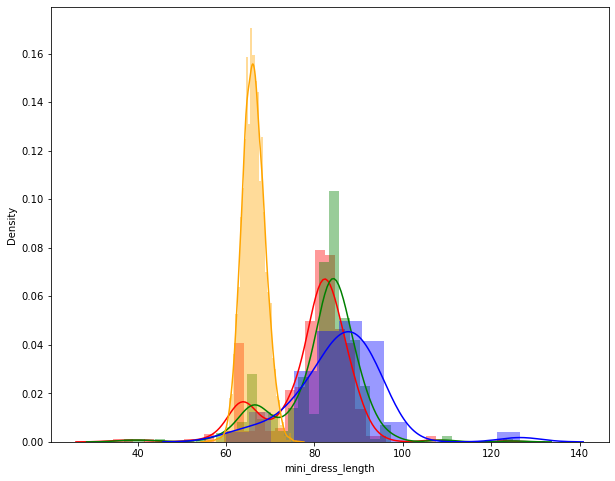

In [37]:
fig, ax = plt.subplots(figsize=(10,8))

sns.distplot(mini_S_total['measures'], color='red')
sns.distplot(mini_M_total['measures'], color='green')
sns.distplot(mini_L_total['measures'], color='blue')
sns.distplot(md_dt_2020['mini_dress_length'], color='orange')

#### ② (목뒤높이 - 허리높이) + (허리높이 - 무릎높이)

In [31]:
dt_2020['mini_dress_length_2'] = (dt_2020.loc[:, "004. 목뒤높이 "] - dt_2020.loc[:, "009. 허리높이 "]) + (dt_2020.loc[:, "009. 허리높이 "] - dt_2020.loc[:, "014. 무릎높이 "])
dt_2020[:5]

,Unnamed: 0,HUMAN_ID,성별,조사년도,조사일,나이,측정지,측정복\n젖가슴둘레,측정복\n상의,측정복\n배꼽수준허리둘레,...,130. 목뒤젖꼭지길이,131. 목뒤젖꼭지허리둘레선길이,132. 배꼽수준샅앞뒤길이,133. 앉은눈높이,134. 앉은목뒤높이,135. 앉은어깨높이,136. 앉은팔꿈치높이(팔굽힌),137. 위팔수직길이(팔굽힌),mini_dress_length,mini_dress_length_2
3,4,20_F_1465,여,2020,1116,42,서울/경기/강원,86.0,85XL,88.0,...,356.5,546.5,882,796,659,626.0,294.0,332.0,71.00,101.3
4,5,20_F_1467,여,2020,1116,42,서울/경기/강원,73.6,75M,74.5,...,331.5,477.5,731,738,592,544.0,234.0,310.0,65.25,92.8
5,6,20_F_1477,여,2020,1116,40,서울/경기/강원,74.3,75M,77.0,...,326.5,488.5,749,738,601,552.0,203.0,349.0,67.55,96.8
6,7,20_F_1486,여,2020,1117,43,서울/경기/강원,77.5,80L,78.0,...,331.5,517.5,741,753,611,581.0,268.0,313.0,66.40,95.2
7,8,20_F_1490,여,2020,1117,40,서울/경기/강원,80.0,80L,80.0,...,333.5,527.5,696,716,578,544.0,245.0,299.0,64.00,90.7


In [32]:
md_dt_2020_2 = dt_2020[['나이', 'mini_dress_length_2']].sort_values(by='나이')
md_dt_2020_2

,나이,mini_dress_length_2
4551,20,97.8
1102,20,95.6
1103,20,97.4
2849,20,93.1
1104,20,91.1
...,...,...
2241,69,93.9
2109,69,91.9
2222,69,87.8
4295,69,89.6


C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

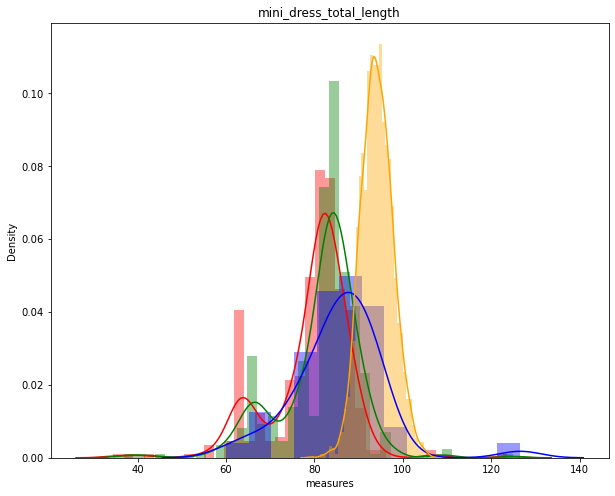

In [39]:
fig, ax = plt.subplots(figsize=(10,8))
plt.title('mini_dress_total_length')

sns.distplot(mini_S_total['measures'], color='red')
sns.distplot(mini_M_total['measures'], color='green')
sns.distplot(mini_L_total['measures'], color='blue')
sns.distplot(md_dt_2020_2[['mini_dress_length_2']], color='orange')

plt.savefig('mini_dress_total_length.png')

## 5) 사이즈코리아 데이터 군집화 (K-평균)
features : 키, 어깨너비, 가슴둘레, 허리둘레, 엉덩이둘레<br>
'2020_size_measures.csv' 파일은 20세 이상 성인에 대한 데이터이다<br>
002. 키 , 059. 어깨사이길이 , 041. 가슴둘레 , 045. 허리둘레 , 048. 엉덩이둘레 ,

In [40]:
#사이즈 코리아 데이터 읽어오기
dt_2020 = pd.read_csv("C:/Users/admin/#실습(221031~221111)/2020_size_measures.csv").query("성별 == '여'")
dt_2020[:5]

C:\Users\admin\AppData\Local\Temp\ipykernel_2348\163013035.py:2: DtypeWarning: Columns (8,10) have mixed types. Specify dtype option on import or set low_memory=False.
  dt_2020 = pd.read_csv("C:/Users/admin/#실습(221031~221111)/2020_size_measures.csv").query("성별 == '여'")


,Unnamed: 0,HUMAN_ID,성별,조사년도,조사일,나이,측정지,측정복\n젖가슴둘레,측정복\n상의,측정복\n배꼽수준허리둘레,...,128. 배꼽수준앞중심길이,129. 배꼽수준등길이,130. 목뒤젖꼭지길이,131. 목뒤젖꼭지허리둘레선길이,132. 배꼽수준샅앞뒤길이,133. 앉은눈높이,134. 앉은목뒤높이,135. 앉은어깨높이,136. 앉은팔꿈치높이(팔굽힌),137. 위팔수직길이(팔굽힌)
3,4,20_F_1465,여,2020,1116,42,서울/경기/강원,86.0,85XL,88.0,...,449,453.0,356.5,546.5,882,796,659,626.0,294.0,332.0
4,5,20_F_1467,여,2020,1116,42,서울/경기/강원,73.6,75M,74.5,...,360,391.0,331.5,477.5,731,738,592,544.0,234.0,310.0
5,6,20_F_1477,여,2020,1116,40,서울/경기/강원,74.3,75M,77.0,...,372,405.0,326.5,488.5,749,738,601,552.0,203.0,349.0
6,7,20_F_1486,여,2020,1117,43,서울/경기/강원,77.5,80L,78.0,...,434,428.0,331.5,517.5,741,753,611,581.0,268.0,313.0
7,8,20_F_1490,여,2020,1117,40,서울/경기/강원,80.0,80L,80.0,...,405,415.0,333.5,527.5,696,716,578,544.0,245.0,299.0


In [43]:
dt_2020.shape

(2773, 148)

In [54]:
dt_2020 = dt_2020.sort_values(by='나이')
dt_2020[:3]

,Unnamed: 0,HUMAN_ID,성별,조사년도,조사일,나이,측정지,측정복\n젖가슴둘레,측정복\n상의,측정복\n배꼽수준허리둘레,...,128. 배꼽수준앞중심길이,129. 배꼽수준등길이,130. 목뒤젖꼭지길이,131. 목뒤젖꼭지허리둘레선길이,132. 배꼽수준샅앞뒤길이,133. 앉은눈높이,134. 앉은목뒤높이,135. 앉은어깨높이,136. 앉은팔꿈치높이(팔굽힌),137. 위팔수직길이(팔굽힌)
4551,4552,21_F_6757,여,2021,825,20,전라/충청,78.0,80.0,62.0,...,406,489.0,322.0,472.0,782,799,679,589.0,283.0,306.0
1102,1103,20_F_2851,여,2021,112,20,서울/경기/강원,87.0,85XL,83.0,...,414,441.0,352.0,538.0,763,781,637,601.0,276.0,325.0
1103,1104,20_F_2852,여,2021,112,20,서울/경기/강원,73.0,80L,74.0,...,394,418.0,335.0,513.0,731,783,630,580.0,251.0,329.0


In [55]:
dt_2020.loc[:, '002. 키 ']

4551    1624
1102    1653
1103    1685
2849    1586
1104    1561
        ... 
2241    1700
2109    1560
2222    1538
4295    1531
4669    1535
Name: 002. 키 , Length: 2773, dtype: int64

In [57]:
#002. 키 , 059. 어깨사이길이 , 041. 가슴둘레 , 045. 허리둘레 , 048. 엉덩이둘레
dt_2020.loc[:, '002. 키 '] = dt_2020.loc[:, '002. 키 '] / 10
dt_2020.loc[:, '059. 어깨사이길이 '] = dt_2020.loc[:, '059. 어깨사이길이 '] / 10
dt_2020.loc[:, '041. 가슴둘레 '] = dt_2020.loc[:, '041. 가슴둘레 '] / 10
dt_2020.loc[:, '045. 허리둘레 '] = dt_2020.loc[:, '045. 허리둘레 '] / 10
dt_2020.loc[:, '048. 엉덩이둘레 '] = dt_2020.loc[:, '048. 엉덩이둘레 '] / 10

In [58]:
dt_2020.loc[:, ['002. 키 ', '059. 어깨사이길이 ', '041. 가슴둘레 ', '045. 허리둘레 ', '048. 엉덩이둘레 ']]

,002. 키,059. 어깨사이길이,041. 가슴둘레,045. 허리둘레,048. 엉덩이둘레
4551,162.4,40.9,80.4,63.2,87.4
1102,165.3,42.2,97.9,81.8,101.0
1103,168.5,38.8,86.4,70.8,94.0
2849,158.6,41.5,89.0,74.1,91.6
1104,156.1,37.6,86.5,69.7,91.4
...,...,...,...,...,...
2241,170.0,41.6,87.5,76.9,90.3
2109,156.0,41.0,100.0,92.7,92.7
2222,153.8,41.3,92.7,90.7,91.2
4295,153.1,38.3,97.7,93.1,97.1
